### 1st Generation Model

29
1429


/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_

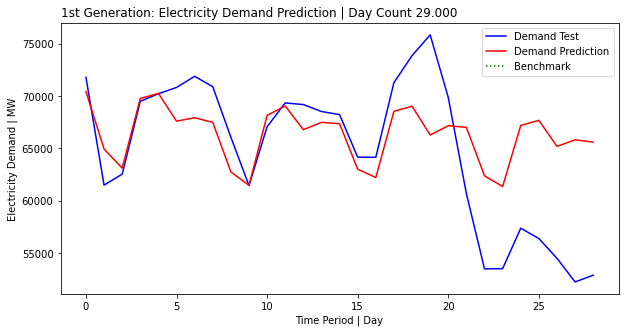

MAE: 4454.648


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('../csv/Combined_Data_Frame.csv', index_col=0)
df = df.sort_values('Record Date')
df1 = df[['Total Demand']].copy()
df1 =  df1.interpolate()
df1 = df1[1:]
df1

#How far in the Future do you want to predict

#Further you go the least precises the Model prediction will be
from sklearn.metrics import mean_absolute_percentage_error

Period = 29

X = df1.values
train_1, test_1 = X[1:len(X)-Period], X[len(X)-Period:]

print(len(X[len(X)-Period:]))


print(len(X[1:len(X)-Period]))

mean = []
mean2 = []
mean3 = []

# autoregression
model = AR(train_1)
model_fit = model.fit()

# predictions
predictions_1 = model_fit.predict(start=len(train_1), end=len(train_1)+len(test_1)-1, dynamic=False)

# creating mean array to plot it
# Mean of the testing
# for i in range(len(test)):
#     mean.append(predictions.mean())
#     mean2.append(test.mean())
#     mean3.append(df1.values.mean())

plt.figure(figsize=(10, 5))
plt.title("1st Generation: Electricity Demand Prediction | Day Count %.3f" % Period, loc = 'left')

plt.plot(test_1, color='blue', label='Demand Test')
plt.plot(predictions_1, color='red', label = 'Demand Prediction')

# plt.plot(mean, color='red', label='Prediction mean', linestyle=':')
# plt.plot(mean2, color='blue', label='Test Mean', linestyle=':')
plt.plot(mean3, color='green', label='Benchmark', linestyle=':')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

# print("Test mean: %.3f" % test.mean())
# print("Predictions mean: %.3f" % predictions.mean())
# print("Total mean: %.3f" % df1.values.mean())

# mse = mean_squared_error(test, predictions, squared=False)
# print('Mean Squared Error: %.3f' % mse)

mae_1 = mean_absolute_error(test_1, predictions_1)
print('MAE: %.3f' % mae_1)

# from sklearn.metrics import mean_absolute_percentage_error
# mape = mean_absolute_percentage_error(test, predictions) * 100
# print('MAPE: %.3f' % mape)

# mae = mean_absolute_error(test, mean)
# print('Mean Absolute Error of Benchmark: %.3f' % mae)

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_13308/85542789.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -29.5042
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3743.02    0.00289204       240.876           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       3744.05   7.98179e-05       81.4995    5.07e-07       0.001      213  LS failed, Hessian reset 
     142        3744.1   9.83907e-05       89.9831   2.204e-06       0.001      261  LS failed, Hessian reset 
     199       3744.57   0.000310856       88.3688      0.5944      0.5944      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       3745.18   0.000157177       189.782   7.897e-07       0.001      446  LS failed, Hessian reset 
     299       3745.78    0.00112411       103.396           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

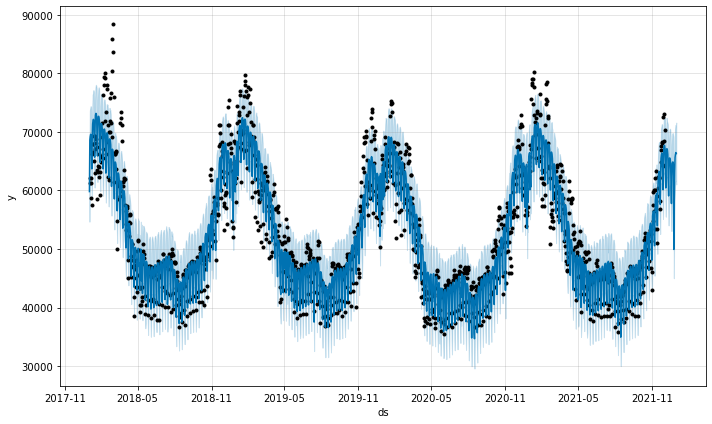

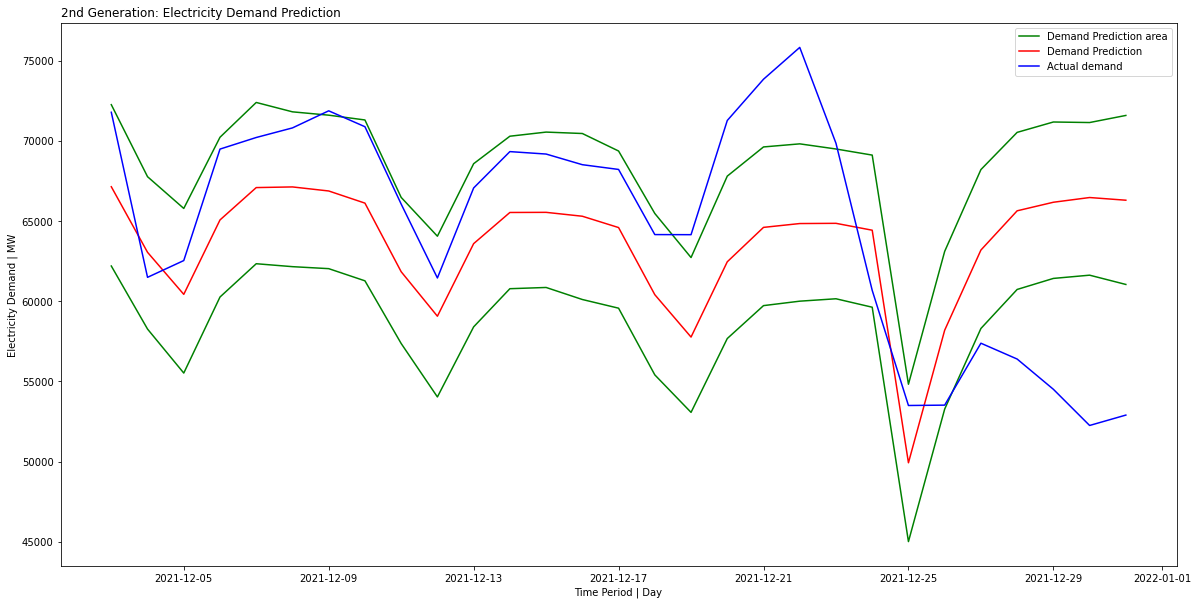

MAE:
5658.745361082009


In [65]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

demand_data = pd.read_csv('../csv/Combined_Data_Frame.csv', index_col=0)
demand_data = demand_data.drop(['Wind Speed', 'Air Temperature', 'Air Temperature(Apparent)', 'Cloud Coverage'] , axis=1)
demand_data = demand_data.reset_index()
demand_data = demand_data.sort_values('Record Date')
demand_data.rename(columns = {'Record Date':'ds', 'Total Demand':'y'}, inplace = True)
demand_data

period = 29

# Splitting Dataset Into Train Set And Test Set

train_set = demand_data[(demand_data.ds < '2021-12-03')]

# train_set = demand_data[(demand_data.ds <= '2021-12-31')]

test_set = demand_data[(demand_data.ds >= '2021-12-03')]

# test_set = df[(df.ds >= '2022-01-01')]

#select the period of the test set
test_set = test_set[:period]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#Facebook prophet model
m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')

#fitting the model
model = m.fit(train_set)

#Create a prediction dataframe
future = m.make_future_dataframe(periods=period,freq='D')

#Create forecast
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

plt.figure(figsize=(20, 10))
plt.title("2nd Generation: Electricity Demand Prediction ", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

mae_2 = mean_absolute_error(y_org, y_pred) 

print('MAE:')
print(mae_2)

# rmse = mean_squared_error(y_org, y_pred, squared=False)
# print('RMSE: %.3f' % rmse)

# from sklearn.metrics import mean_absolute_percentage_error
# mape = mean_absolute_percentage_error(y_org, y_pred) * 100
# print('MAPE: %.3f' % mape)

predictions_2 = forecast['yhat'][-period:].values
# prediction_2

/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


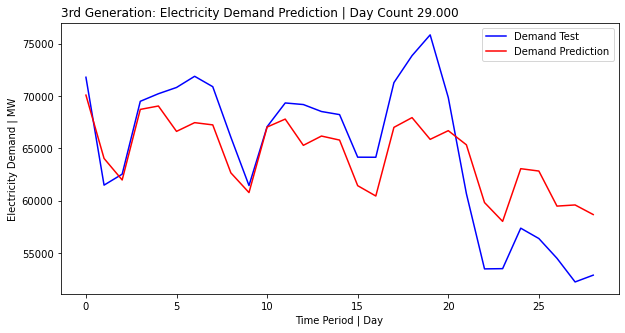

MAE of the model is: 3750.136


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

df2 = pd.read_csv('../csv/Combined_Data_Frame.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# df2 = pd.read_csv('../../csv/demand_2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df2 = df2.sort_values('Record Date')
df2 = df2.interpolate() 
df2 = df2[1:]
# df2

# Setting the prediction period
period = 29

X = df2['Total Demand'].values 
train, test = X[1:len(X)-period], X[len(X)-period:]

# w = df2['Wind Speed'].values
# w_train, w_test = w[1:len(w)-period], w[len(w)-period:]

a = df2['Air Temperature'].values
a_train, a_test = a[1:len(a)-period], a[len(a)-period:] 

# ap = df2['Air Temperature(Apparent)'].values
# ap_train, ap_test = ap[1:len(ap)-period], ap[len(ap)-period:] 

c = df2['Cloud Coverage'].values
c_train, c_test = c[1:len(c)-period], c[len(c)-period:] 

array_train = np.array([a_train,])
array_test = np.array([a_test])

array_train = array_train.reshape((1429,  1)) 
array_test = array_test.reshape((period, 1))

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order

lags = ar_select_order(train, maxlag=30, seasonal=True, period=12)

auto = AutoReg(train, lags=lags.ar_lags, trend="t", seasonal=True, exog=array_train, period=12).fit()
predictions_3 = auto.predict(start=len(train), end=len(train)+len(test)-1, exog_oos=array_test)

plt.figure(figsize=(10, 5))
plt.title("3rd Generation: Electricity Demand Prediction | Day Count %.3f" % period, loc = 'left')

plt.plot(test, color='blue', label='Demand Test')
plt.plot(predictions_3, color='red', label = 'Demand Prediction')


plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

mae_3 = mean_absolute_error(test, predictions_3)
print('MAE of the model is: %.3f' % mae_3)

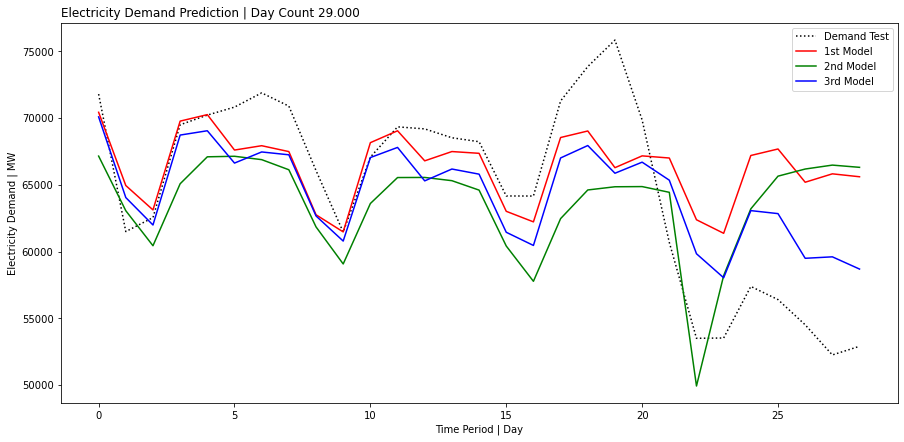

1st generation MAE: 4454.648
2nd generation MAE: 5658.745
3rd generation MAE: 3750.136


In [77]:
plt.figure(figsize=(15, 7))
plt.title("Electricity Demand Prediction | Day Count %.3f" % Period, loc = 'left')

plt.plot(test, color='black', label='Demand Test', linestyle=':')
plt.plot(predictions_1, color='red', label = '1st Model')
plt.plot(predictions_2, color='green', label = '2nd Model')
plt.plot(predictions_3, color='blue', label = '3rd Model')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

print('1st generation MAE: %.3f' % mae_1)
print('2nd generation MAE: %.3f' % mae_2)
print('3rd generation MAE: %.3f' % mae_3)